# Building Word Cloud from given text data set

In [1]:
#Import libraries
import os

with open(os.getcwd()+ "/MahatmaGandhi.txt", 'r') as fh: 
    filedata = fh.read()

In [2]:
#Read the data
#Print first 500 characters in the file
print("Data read from file : ", filedata[0:500] )

Data read from file :  There is no reason to believe that there is one law for families and another for nations.
When I despair, I remember that all through history the way of truth and love has always won.
There have been tyrants and murderers and for a time they seem invincible, but in the end, they
always fall - think of it, always.
An eye for an eye makes the whole world blind.
Retaliation is counter-poison and poison breeds more poison. The nectar of Love alone can
destroy the poison of hate.
I see neither braver


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnjaliAbhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [5]:
corpus=PlaintextCorpusReader(os.getcwd(),"MahatmaGandhi.txt")
print(corpus)

<PlaintextCorpusReader in 'C:\\Users\\AnjaliAbhiram'>


In [6]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['MahatmaGandhi.txt']


In [7]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  1


In [8]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))
print("\n The first sentence : ", sentences[0])


 Total sentences in this corpus :  51

 The first sentence :  ['There', 'is', 'no', 'reason', 'to', 'believe', 'that', 'there', 'is', 'one', 'law', 'for', 'families', 'and', 'another', 'for', 'nations', '.']


In [9]:
#Extract words from the corpus
print("\n Words in this corpus : ",corpus.words() )


 Words in this corpus :  ['There', 'is', 'no', 'reason', 'to', 'believe', ...]


In [10]:
#Find the frequency distribution of words in the corpus
course_freq_dist=nltk.FreqDist(corpus.words())

#Print most commonly used words
print("Top 10 words in the corpus : ", course_freq_dist.most_common(10))

#find the distribution for a specific word
print("\n Distribution for \"delighted\" : ",course_freq_dist.get("delighted"))

Top 10 words in the corpus :  [('.', 51), ('the', 40), ('is', 32), ('of', 29), (',', 27), ('to', 18), ('and', 17), ('a', 12), ('in', 10), ('not', 10)]

 Distribution for "delighted" :  None


In [11]:
token_list = nltk.word_tokenize(filedata)
print("Token List : ",token_list[:20])
print("\n Total Tokens : ",len(token_list))

Token List :  ['There', 'is', 'no', 'reason', 'to', 'believe', 'that', 'there', 'is', 'one', 'law', 'for', 'families', 'and', 'another', 'for', 'nations', '.', 'When', 'I']

 Total Tokens :  801


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
wordcloud1 = WordCloud().generate(filedata)

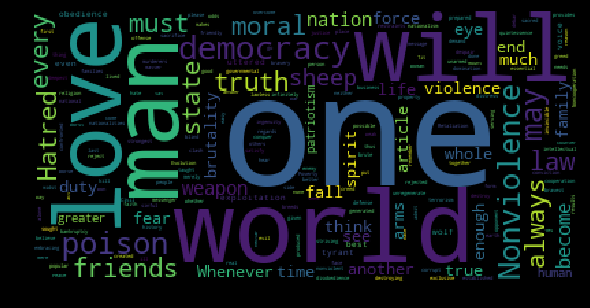

In [14]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "Black") 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [15]:
def wordfreq(tokens):
    word_freq = {}
    for tok in token_list:
        if tok.lower() in word_freq:
            word_freq = tok.lower.append()
        else:
            word_freq = tok.lower()
    return word_freq

<FreqDist with 343 samples and 801 outcomes>
[('.', 51), ('the', 40), ('is', 32), ('of', 29), (',', 27), ('to', 18), ('and', 17), ('a', 12), ('not', 11), ('in', 10), ('be', 10), ('for', 8), ('The', 8), ('or', 8), ('one', 7), ('you', 7), ('that', 6), ('all', 6), ('world', 6), ('can', 6), ('with', 6), ("'s", 6), ('from', 6), ('I', 5), ('have', 5)]


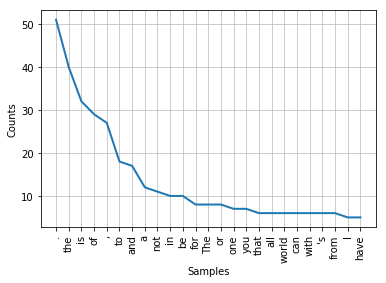

In [16]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [17]:
#Cleansing the text
#Use the Punkt library to extract tokens
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing punctuation : ",token_list2[:20])
print("\nTotal tokens after removing punctuation : ", len(token_list2))

Token List after removing punctuation :  ['There', 'is', 'no', 'reason', 'to', 'believe', 'that', 'there', 'is', 'one', 'law', 'for', 'families', 'and', 'another', 'for', 'nations', 'When', 'I', 'despair']

Total tokens after removing punctuation :  714


In [18]:
def comment(tokens):
    comment_words = ' '
    for word in tokens:
        comment_words = comment_words + word + ' '
    return comment_words

In [19]:
cleaned_text = comment(token_list2)

In [20]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='Orange', 
                min_font_size = 10).generate(cleaned_text)

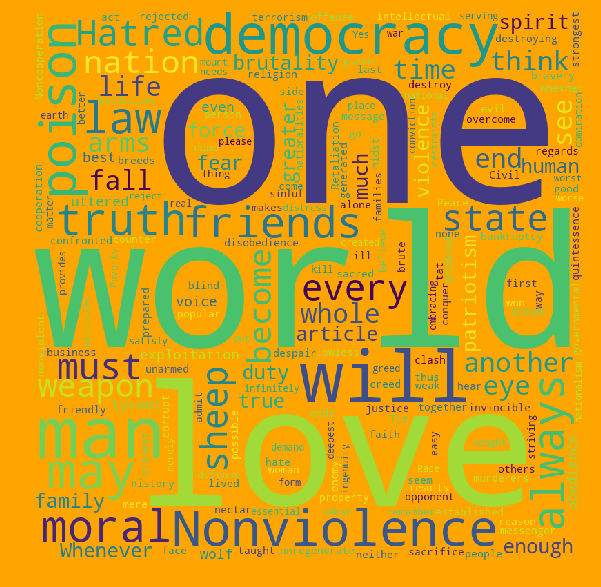

In [21]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "Orange") 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [22]:
#Normalization
token_list3=[word.lower() for word in token_list2 ]
print("Token list after converting to lower case : ", token_list3[:20])
print("\nTotal tokens after converting to lower case : ", len(token_list3))

Token list after converting to lower case :  ['there', 'is', 'no', 'reason', 'to', 'believe', 'that', 'there', 'is', 'one', 'law', 'for', 'families', 'and', 'another', 'for', 'nations', 'when', 'i', 'despair']

Total tokens after converting to lower case :  714


<FreqDist with 317 samples and 714 outcomes>
[('the', 48), ('is', 32), ('of', 29), ('to', 19), ('and', 17), ('a', 13), ('in', 11), ('not', 11), ('for', 10), ('be', 10), ('it', 8), ('or', 8), ('one', 7), ('you', 7), ('that', 6), ('all', 6), ('world', 6), ('can', 6), ('with', 6), ("'s", 6), ('from', 6), ('no', 5), ('i', 5), ('love', 5), ('have', 5)]


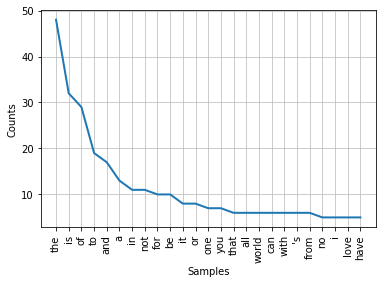

In [23]:
Freq_dist_nltk=nltk.FreqDist(token_list3)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [24]:
#WordCloud Function calling
Normalized_text = comment(token_list3)

In [25]:
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='Pink', 
                min_font_size = 10).generate(Normalized_text)

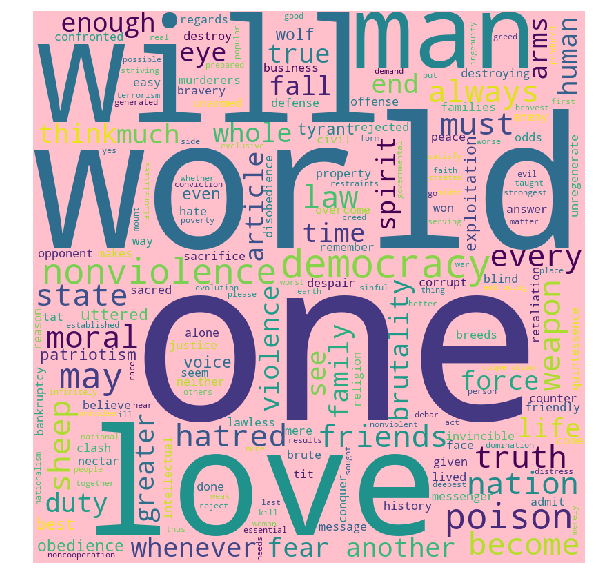

In [26]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [27]:
#Stop Word Removal

#Download the standard stopword list

nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
token_list4 = list(filter(lambda token: token not in stopwords.words('english'), token_list3))
print("Token list after removing stop words : ", token_list4[:20])
print("\nTotal tokens after removing stop words : ", len(token_list4))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AnjaliAbhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Token list after removing stop words :  ['reason', 'believe', 'one', 'law', 'families', 'another', 'nations', 'despair', 'remember', 'history', 'way', 'truth', 'love', 'always', 'tyrants', 'murderers', 'time', 'seem', 'invincible', 'end']

Total tokens after removing stop words :  341


<FreqDist with 251 samples and 341 outcomes>
[('one', 7), ('world', 6), ("'s", 6), ('love', 5), ('man', 5), ('democracy', 5), ('nonviolence', 4), ('may', 4), ('law', 3), ('truth', 3), ('always', 3), ('poison', 3), ('moral', 3), ('friends', 3), ('must', 3), ('state', 3), ('every', 3), ('sheep', 3), ('weapon', 3), ('another', 2), ('nations', 2), ('end', 2), ('fall', 2), ('think', 2), ('eye', 2)]


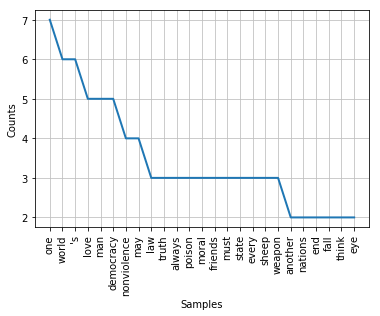

In [28]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list4)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [29]:
#Word Cloud Function calling
Stop_word = comment(token_list4)

In [30]:
wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='White', 
                min_font_size = 10).generate(Stop_word)

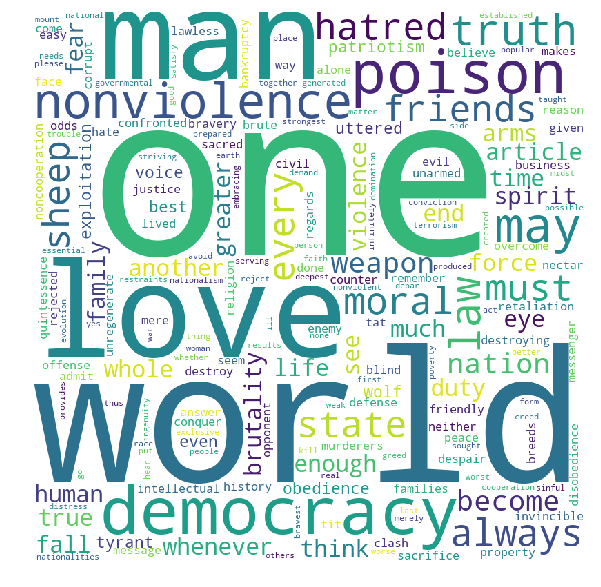

In [31]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [32]:
#Stemming
#Use the PorterStemmer library for stemming.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Stem data
token_list5 = [stemmer.stem(word) for word in token_list4 ]
print("Token list after stemming : ", token_list5[:20])
print("\nTotal tokens after Stemming : ", len(token_list5))

Token list after stemming :  ['reason', 'believ', 'one', 'law', 'famili', 'anoth', 'nation', 'despair', 'rememb', 'histori', 'way', 'truth', 'love', 'alway', 'tyrant', 'murder', 'time', 'seem', 'invinc', 'end']

Total tokens after Stemming :  341


<FreqDist with 238 samples and 341 outcomes>
[('one', 7), ('nation', 6), ('world', 6), ("'s", 6), ('love', 5), ('man', 5), ('democraci', 5), ('nonviol', 5), ('may', 4), ('law', 3), ('famili', 3), ('truth', 3), ('alway', 3), ('poison', 3), ('moral', 3), ('friend', 3), ('must', 3), ('becom', 3), ('duti', 3), ('state', 3), ('everi', 3), ('sheep', 3), ('weapon', 3), ('anoth', 2), ('tyrant', 2)]


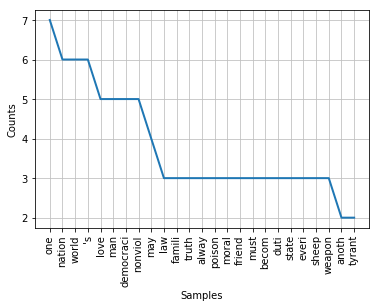

In [33]:
#Frequncy Distribution after Stemming
Freq_dist_nltk=nltk.FreqDist(token_list5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [34]:
#Word Cloud Function calling
Stem_word = comment(token_list5)

In [35]:
wordcloud5 = WordCloud(width = 800, height = 800, 
                background_color ='Purple', 
                min_font_size = 10).generate(Stem_word)

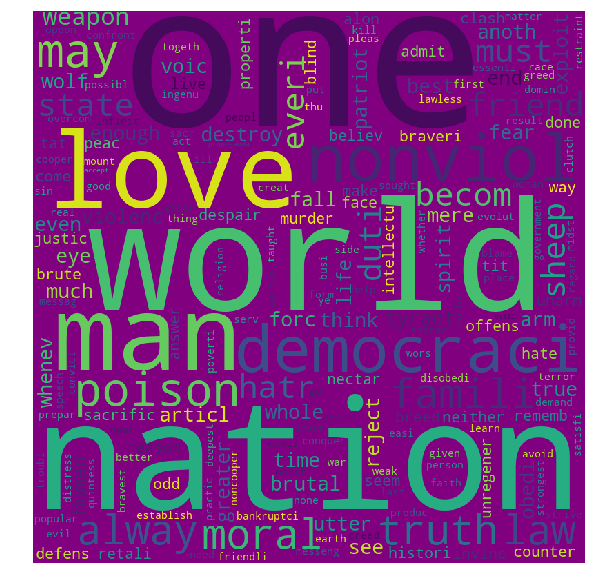

In [36]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud5) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [37]:
#Lemmatization
#Use the wordnet library to map words to their lemmatized form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
token_list6 = [lemmatizer.lemmatize(word) for word in token_list4 ]
print("Token list after Lemmatization : ", token_list6[:20])
print("\nTotal tokens after Lemmatization : ", len(token_list6))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AnjaliAbhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Token list after Lemmatization :  ['reason', 'believe', 'one', 'law', 'family', 'another', 'nation', 'despair', 'remember', 'history', 'way', 'truth', 'love', 'always', 'tyrant', 'murderer', 'time', 'seem', 'invincible', 'end']

Total tokens after Lemmatization :  341


<FreqDist with 246 samples and 341 outcomes>
[('one', 7), ('world', 6), ("'s", 6), ('love', 5), ('man', 5), ('democracy', 5), ('nonviolence', 4), ('may', 4), ('law', 3), ('family', 3), ('nation', 3), ('truth', 3), ('always', 3), ('poison', 3), ('moral', 3), ('friend', 3), ('must', 3), ('duty', 3), ('state', 3), ('every', 3), ('sheep', 3), ('weapon', 3), ('another', 2), ('tyrant', 2), ('time', 2)]


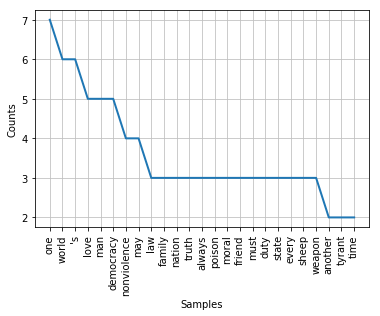

In [38]:
#Frequncy Distribution after stop word removal
Freq_dist_nltk=nltk.FreqDist(token_list6)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [39]:
Lemmatized_text = comment(token_list6)

In [40]:
wordcloud6 = WordCloud(width = 800, height = 800, 
                background_color ='Green', 
                min_font_size = 10).generate(Lemmatized_text)

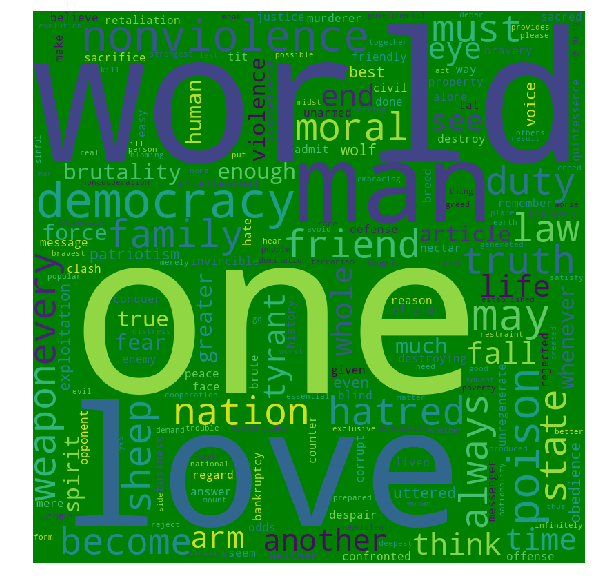

In [41]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud6) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Building Word Cloud from web page of speech by Indian President on the occasion of Independence Day

In [42]:
#National Day speech 
from urllib.request import urlopen 
response = urlopen('https://timesofindia.indiatimes.com/india/president-ram-nath-kovinds-independence-day-speech-full-text/articleshow/70679420.cms') 
html = response.read() 
print(len(html)) 
tokens = [tok for tok in html.split()]

182779


In [43]:
 #We clean it a bit 
from bs4 import BeautifulSoup 
print("Calling BS4") 
soup = BeautifulSoup(html, 'html.parser') 

#Kill all script and style elements 
for script in soup(["script", "style"]):    
    script.extract() 

Calling BS4


In [44]:
#Get the token 
tokens = [tok for tok in soup.get_text().split()]

In [45]:
 print(tokens[0:100])

['India', 'Independence', 'Day', 'speech:', 'President', 'Ram', 'Nath', 'Kovind', 'Independence', 'Day', 'speech:', 'Full', 'text', '|', 'India', 'News', '-', 'Times', 'of', 'India', 'Open', 'in', 'app+Englishहिन्दीमराठीবাংলা', 'ગુજરાતીಕನ್ನಡதமிழ்తెలుగుമലയാളം|Epaper|GadgetsNowHI,', 'Edit', 'ProfileMy', 'TimesRedeemLOGOUTSign', 'InNotification', 'CenterIndiaBriefsWorldBusinessSportsEntertainmentTVLife', '&', 'StylePhotosEducationPoliticsElectionsIndiaMaharashtraDelhiKarnatakaTamil', 'NaduTelanganaUttar', 'PradeshWest', 'BengalGujaratMadhya', 'PradeshBiharChandigarhRajasthanArunachal', 'PradeshAndhra', 'PradeshAssamChhattisgarhGoaHaryanaHimachal', 'PradeshJammu', 'and', 'KashmirJharkhandKeralaManipurMeghalayaMizoramNagalandOdishaPunjabSikkimTripuraUttarakhandAndaman', 'and', 'Nicobar', 'IslandsDadra', 'and', 'Nagar', 'HaveliDaman', 'and', 'DiuLakshadweepPondicherry', '+', 'News', '/', 'India', 'NewsTop', 'Searches:Narendra', 'ModiElections', '2019Priyanka', 'GandhiElection', 'ResultsRTI',

In [46]:
def wordfreq (words):    
    """Function to generated the frequency distribution of the 
given text"""    
    word_freq={}    
    for tok in words:        
        if tok.lower() in word_freq:            
            word_freq [tok.lower()]+=1        
        else:            
            word_freq [tok.lower()]=1    
    return word_freq

In [47]:
new_tokens = wordfreq(tokens) 

<FreqDist with 1351 samples and 2647 outcomes>
[('and', 122), ('the', 91), ('of', 84), ('to', 76), ('in', 48), ('our', 44), ('a', 36), ('for', 29), ('is', 22), ('as', 21), ('that', 20), ('on', 15), ('–', 15), ('Election', 15), ('their', 14), ('India', 13), ('I', 13), ('from', 13), ('we', 13), ('it', 13), ('can', 13), ('have', 12), ('government', 12), ('with', 11), ('will', 11), ('this', 10), ('Independence', 9), ('all', 9), ('or', 9), ('We', 9), ('us', 9), ('The', 9), ('be', 9), ('election', 9), ('infrastructure', 9)]


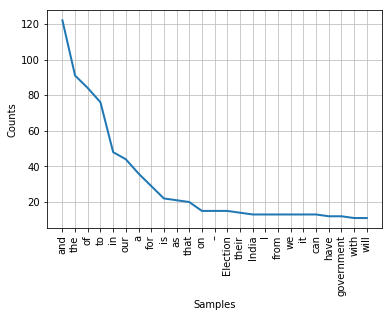

In [48]:
import nltk 
import operator 
%matplotlib inline 
Freq_dist_nltk=nltk.FreqDist(tokens) 
print(Freq_dist_nltk) 
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True) 
print(sorted_d[:35]) 
Freq_dist_nltk.plot(25, cumulative=False)

In [49]:
def plot_wordcloud(wordcloud):    
    plt.imshow(wordcloud)    
    plt.axis("off")    
    plt.show()

In [50]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud7 = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text()) 

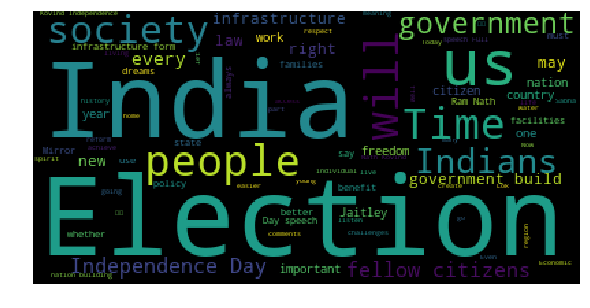

In [51]:
#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud7) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 